# explore
> Exploring datasets provided

In [ ]:
import pandas as pd
import numpy as np
import sklearn.datasets as ds
import sklearn.model_selection as ms
import sklearn.ensemble as en
from sklearn import linear_model
from mana_signals.data import *

In [ ]:
d=pd.read_csv('../marketdata/20230101.MATIC.csv.gz', compression='gzip');d

,exchange,symbol,timestamp,local_timestamp,id,side,price,amount
0,bybit,MATICUSDT,1672531202718000,1672531202789350,879e0dcd-cee1-5d5d-b031-2c8f18f14d75,buy,0.7580,2752
1,bybit,MATICUSDT,1672531206141000,1672531206276571,cf0bdde5-10ad-5cd1-acf4-8ced48b3b5fd,buy,0.7580,1790
2,bybit,MATICUSDT,1672531207221000,1672531207272223,814aa74c-3209-501f-9b49-16ae0a3fc930,sell,0.7579,673
3,bybit,MATICUSDT,1672531207791000,1672531207872568,422980a6-3f9e-5f3b-a514-4c48a14d30c1,buy,0.7580,21
4,bybit,MATICUSDT,1672531211417000,1672531211472638,55ac929e-7319-50dc-9853-187297a6289f,sell,0.7579,24998
...,...,...,...,...,...,...,...,...
26146,bybit,MATICUSDT,1672617596680000,1672617596772372,bc17597e-4144-5f34-9af3-fbf507e88382,sell,0.7602,1289
26147,bybit,MATICUSDT,1672617596680000,1672617596772372,323b97da-d06a-5403-bbcc-7e6dd9623967,sell,0.7602,3281
26148,bybit,MATICUSDT,1672617596725000,1672617596772372,746e89ad-ebcb-5cab-8cc6-ad47cefc1771,sell,0.7601,2000
26149,bybit,MATICUSDT,1672617597691000,1672617597772425,fa978731-8923-5313-b24e-1ce5a523673a,sell,0.7600,1442


In [ ]:
d['date']=pd.to_datetime(d.local_timestamp, unit='us'); 
d.set_index('date', inplace=True);d

,exchange,symbol,timestamp,local_timestamp,id,side,price,amount
date,,,,,,,,
2023-01-01 00:00:02.789350,bybit,MATICUSDT,1672531202718000,1672531202789350,879e0dcd-cee1-5d5d-b031-2c8f18f14d75,buy,0.7580,2752
2023-01-01 00:00:06.276571,bybit,MATICUSDT,1672531206141000,1672531206276571,cf0bdde5-10ad-5cd1-acf4-8ced48b3b5fd,buy,0.7580,1790
2023-01-01 00:00:07.272223,bybit,MATICUSDT,1672531207221000,1672531207272223,814aa74c-3209-501f-9b49-16ae0a3fc930,sell,0.7579,673
2023-01-01 00:00:07.872568,bybit,MATICUSDT,1672531207791000,1672531207872568,422980a6-3f9e-5f3b-a514-4c48a14d30c1,buy,0.7580,21
2023-01-01 00:00:11.472638,bybit,MATICUSDT,1672531211417000,1672531211472638,55ac929e-7319-50dc-9853-187297a6289f,sell,0.7579,24998
...,...,...,...,...,...,...,...,...
2023-01-01 23:59:56.772372,bybit,MATICUSDT,1672617596680000,1672617596772372,bc17597e-4144-5f34-9af3-fbf507e88382,sell,0.7602,1289
2023-01-01 23:59:56.772372,bybit,MATICUSDT,1672617596680000,1672617596772372,323b97da-d06a-5403-bbcc-7e6dd9623967,sell,0.7602,3281
2023-01-01 23:59:56.772372,bybit,MATICUSDT,1672617596725000,1672617596772372,746e89ad-ebcb-5cab-8cc6-ad47cefc1771,sell,0.7601,2000


In [ ]:
from pathlib import Path
from fastcore.all import *

In [ ]:
def get_symbols(market_data_path: Path): # Location of marketdata directory
    "Returns a list of all symbols available at given market data dump directory"
    def extract_symbol(p:Path): 
        return (p.name.split('.')[1])
    return list(set(map(extract_symbol, market_data_path.ls())))

def load_symbol(market_data_path: Path, symbol: str): 
    result = None
    for file in market_data_path.glob(f"*.{symbol}.csv.gz"): 
        print(f'processing file {file}')
        df = pd.read_csv(file, compression="gzip")
        df['date'] = pd.to_datetime(df.local_timestamp, unit='us')
        df.set_index('date', inplace=True)
        result = df if result is None else pd.concat([result,df])
    return result.sort_index()
    

In [ ]:
market_data_dir=Path('../marketdata')
symbols=get_symbols(market_data_dir); symbols

['MATIC', 'XRP', 'OP']

In [ ]:
loaded_data = dict((sym, load_symbol(market_data_dir, sym)) for sym in symbols)

processing file ../marketdata/20230501.MATIC.csv.gz
processing file ../marketdata/20231001.MATIC.csv.gz
processing file ../marketdata/20230201.MATIC.csv.gz
processing file ../marketdata/20230301.MATIC.csv.gz
processing file ../marketdata/20231101.MATIC.csv.gz
processing file ../marketdata/20230401.MATIC.csv.gz
processing file ../marketdata/20230601.MATIC.csv.gz
processing file ../marketdata/20230101.MATIC.csv.gz
processing file ../marketdata/20230901.MATIC.csv.gz
processing file ../marketdata/20230801.MATIC.csv.gz
processing file ../marketdata/20230701.MATIC.csv.gz
processing file ../marketdata/20231201.MATIC.csv.gz
processing file ../marketdata/20230701.XRP.csv.gz
processing file ../marketdata/20231201.XRP.csv.gz
processing file ../marketdata/20230601.XRP.csv.gz
processing file ../marketdata/20230101.XRP.csv.gz
processing file ../marketdata/20231101.XRP.csv.gz
processing file ../marketdata/20230301.XRP.csv.gz
processing file ../marketdata/20230401.XRP.csv.gz
processing file ../marketd

In [ ]:
loaded_data['OP'].shape

(2010003, 8)

In [ ]:
op=loaded_data['OP']; op

,exchange,symbol,timestamp,local_timestamp,id,side,price,amount
date,,,,,,,,
2023-01-01 00:00:15.722467,bybit,OPUSDT,1672531215663000,1672531215722467,52778cfb-e40c-5bfc-a3c2-d2f10330d30c,buy,0.9175,218.1
2023-01-01 00:01:05.022988,bybit,OPUSDT,1672531264958000,1672531265022988,978a157d-fd39-5a9e-bf7b-03f5b1ec5e68,buy,0.9175,11.0
2023-01-01 00:01:11.523812,bybit,OPUSDT,1672531271409000,1672531271523812,d772dfc0-be35-5315-b48a-eaa6cf278a90,buy,0.9175,490.4
2023-01-01 00:01:11.523812,bybit,OPUSDT,1672531271409000,1672531271523812,aa52db3b-cbec-5983-b929-a990a4ddb22e,buy,0.9175,60.8
2023-01-01 00:01:11.523812,bybit,OPUSDT,1672531271410000,1672531271523812,8b94fb5f-bf11-5ea0-8f3e-e77365b515a1,buy,0.9175,45.3
...,...,...,...,...,...,...,...,...
2023-12-01 23:59:28.742716,bybit,OPUSDT,1701475168704000,1701475168742716,ea55256e-405f-5463-907e-d51692b421e6,sell,1.6591,51.0
2023-12-01 23:59:28.743235,bybit,OPUSDT,1701475168704000,1701475168743235,9927618c-7d99-5f2a-9219-ce1945d5ee75,sell,1.6587,534.6
2023-12-01 23:59:59.327312,bybit,OPUSDT,1701475199288000,1701475199327312,ea2612e8-a491-51b5-86d5-ab3192004e6a,sell,1.6584,16.9


In [ ]:
import matplotlib.pyplot as plt

[<matplotlib.lines.Line2D>]

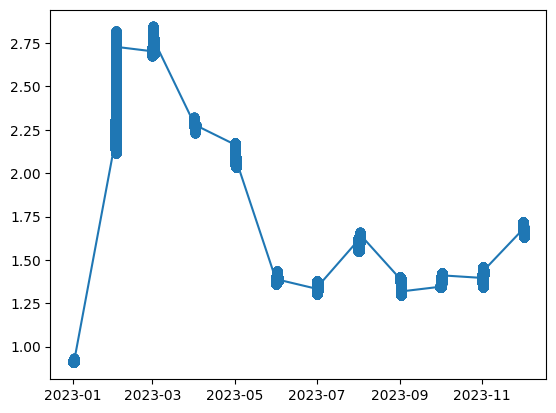

In [ ]:
plt.plot(op['price'], marker='o')

In [ ]:
def get_days_with_data(data): return data.index.normalize().unique().copy().sort_values()
for k,v in loaded_data.items(): print (k, get_days_with_data(v))

MATIC DatetimeIndex(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='date', freq=None)
XRP DatetimeIndex(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='date', freq=None)
OP DatetimeIndex(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='date', freq=None)


Based on above data, we see that we have data for the first day of each month of 2023 for symbols MATIC, XRP, OP.

---

# Let's try to analyze the series 2023-01-01 for OP

In [ ]:
def get_month_data(symbol:str, month:int): 
    d=loaded_data[symbol]
    return d[d.index.normalize()==pd.to_datetime(f'2023-{month:2}-01')]; 
len(get_month_data('OP',1))

13126

[<matplotlib.lines.Line2D>]

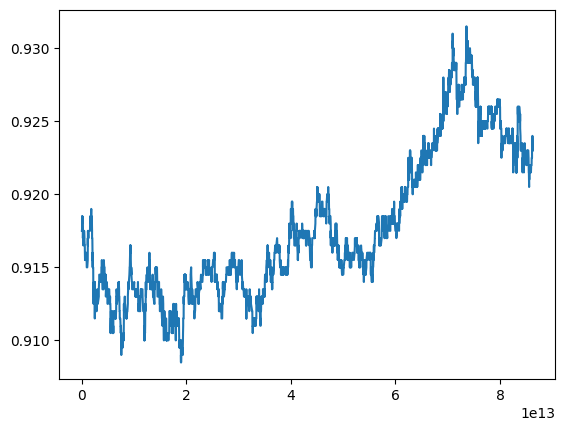

In [ ]:
d=get_month_data('OP', 1)
d.index = d.index-d.index[0];
plt.plot(d.price)

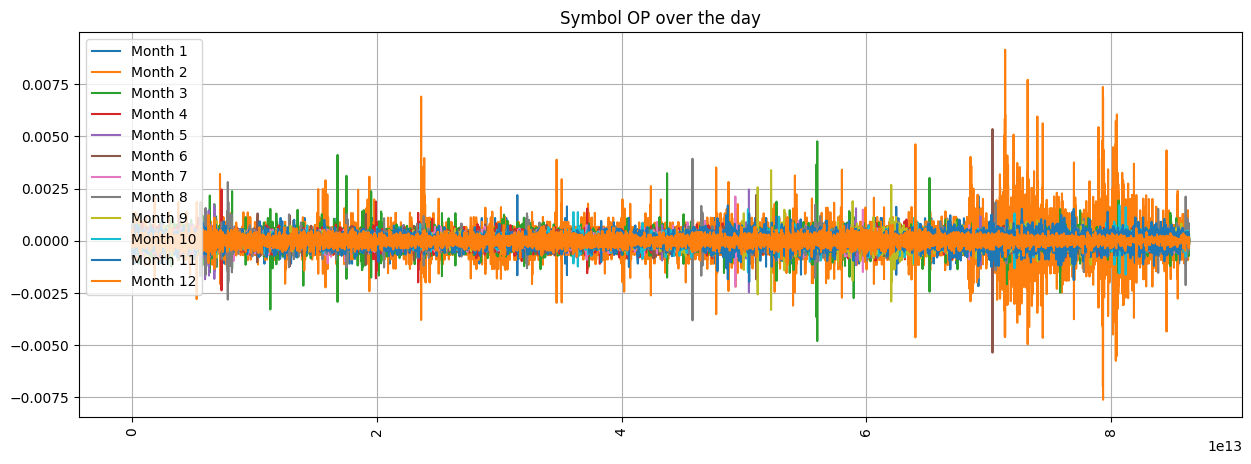

In [ ]:
def plot_daily_change(d_jan, m):
    plt.figure(figsize=(15,5));plt.plot(np.log(d_jan.price).diff()); plt.title(f'Movements of OP within a 1st day of month {m}'); plt.grid(True); plt.xticks(rotation=90)
#for i in range(12): plot_daily_change(get_month_data('OP', i+1), i+1)

def plot_all_months(symbol): 
    plt.figure(figsize=(15,5))
    for m in range(12): 
        d = get_month_data(symbol, m+1)
        d.index = d.index-d.index[0]
        plt.plot(np.log(d.price).diff(), label=f"Month {m+1}")
    plt.grid(True); plt.xticks(rotation=90)
    plt.legend()
    plt.title(f'Symbol {symbol} over the day')
plot_all_months('OP')

# Let's see if we can predict a value 1 minute ahead

In [ ]:
d=get_month_data('OP',1)
r=d.rolling('1h')
r[['price', 'amount']]

Rolling [window=1h,min_periods=1,center=False,axis=0,method=single]

In [ ]:
v=d.index.values[-1]
d[(d.index<v) & ((v-d.index)<=np.timedelta64(1,'h'))]

,exchange,symbol,timestamp,local_timestamp,id,side,price,amount
date,,,,,,,,
2023-01-01 22:58:36.122780,bybit,OPUSDT,1672613916082000,1672613916122780,92929f0d-8d9b-5f4f-9470-8a6b833040a5,sell,0.9230,1599.5
2023-01-01 22:58:36.122780,bybit,OPUSDT,1672613916082000,1672613916122780,2a5f516d-9d55-5068-bc34-116dfaf70254,sell,0.9230,294.9
2023-01-01 22:58:47.122591,bybit,OPUSDT,1672613926988000,1672613927122591,5142a024-2545-557d-8576-4cf63db92dba,sell,0.9230,34.9
2023-01-01 23:00:05.423478,bybit,OPUSDT,1672614005376000,1672614005423478,29e21855-46b3-5db9-9cf3-a0e821891d0f,sell,0.9230,590.3
2023-01-01 23:00:05.423478,bybit,OPUSDT,1672614005376000,1672614005423478,54fb0eb4-e614-504e-ac7e-51737f630e54,sell,0.9230,1772.1
...,...,...,...,...,...,...,...,...
2023-01-01 23:57:08.524573,bybit,OPUSDT,1672617428476000,1672617428524573,1a5d5381-01fa-5230-acd0-0e85be3ca653,buy,0.9240,33.1
2023-01-01 23:57:36.423056,bybit,OPUSDT,1672617456359000,1672617456423056,6bfdc66f-016e-5f8f-a1d7-6b530285cf85,sell,0.9235,8046.8
2023-01-01 23:57:36.423056,bybit,OPUSDT,1672617456369000,1672617456423056,a9f3fb3c-8020-55c0-80fe-5986e271476d,sell,0.9235,1173.4
